In [46]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

In [47]:
# Loading dataset

df = pd.read_csv('Breast_Cancer.csv')

In [48]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [50]:
df.shape

(4024, 16)

In [51]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

# Data Preprocessing

In [53]:
# Checking for null values

df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [54]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column in the dataset
for col in ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Status']:
    df[col] = label_encoder.fit_transform(df[col])


In [55]:
# Using Max Min Scaler

columns_to_scale = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', '6th Stage']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform them
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [56]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0.974359,2,1,0,0,0.00,1,3,1,0.027523,1,1,0.383333,0.000000,0.556604,0
1,0.512821,2,1,1,1,0.50,0,2,1,0.311927,1,1,0.216667,0.088889,0.575472,0
2,0.717949,2,0,2,2,1.00,0,2,1,0.568807,1,1,0.216667,0.133333,0.698113,0
3,0.717949,2,1,0,0,0.00,1,3,1,0.155963,1,1,0.016667,0.000000,0.783019,0
4,0.435897,2,1,1,0,0.25,1,3,1,0.366972,1,1,0.033333,0.000000,0.462264,0


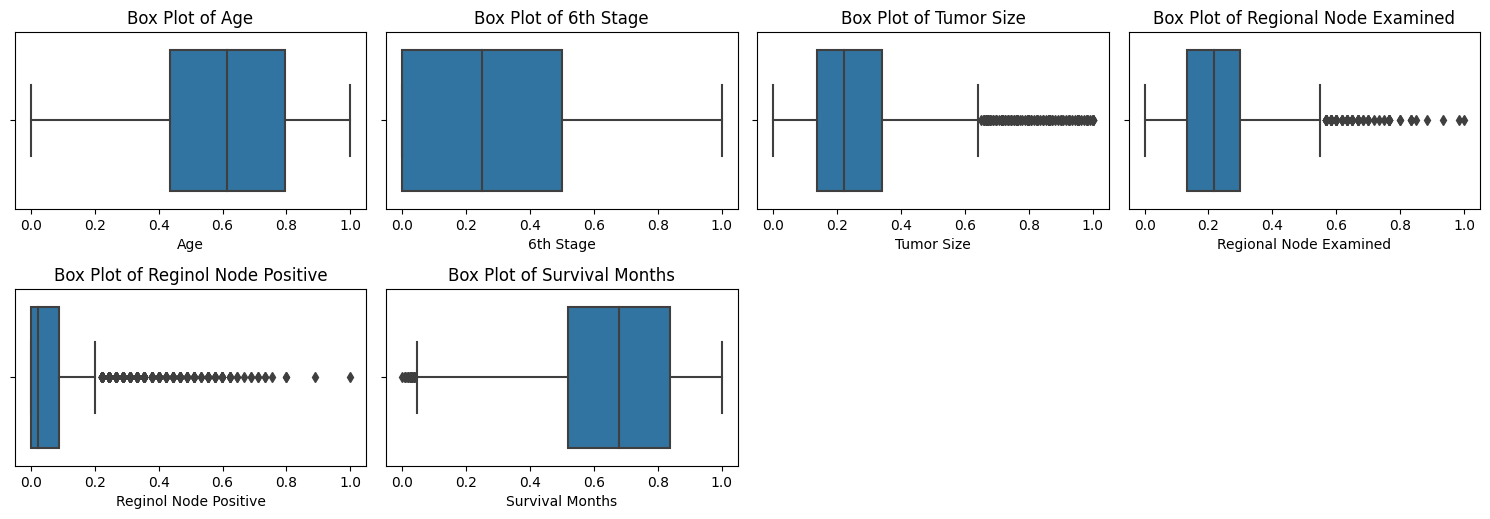

In [57]:
# Visualizing outliers using box plots
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns  # Select numeric columns

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  # Adjust the subplot grid size based on the number of numeric columns
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [58]:
# Identifying outliers using the IQR method
outliers_dict = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

    # Identifying outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers

# Displaying outliers for each column
for col, outliers in outliers_dict.items():
    print(f'Outliers in {col}:')
    print(outliers)
    print('\n')

Outliers in Age:
Empty DataFrame
Columns: [Age, Race, Marital Status, T Stage , N Stage, 6th Stage, differentiate, Grade, A Stage, Tumor Size, Estrogen Status, Progesterone Status, Regional Node Examined, Reginol Node Positive, Survival Months, Status]
Index: []


Outliers in 6th Stage:
Empty DataFrame
Columns: [Age, Race, Marital Status, T Stage , N Stage, 6th Stage, differentiate, Grade, A Stage, Tumor Size, Estrogen Status, Progesterone Status, Regional Node Examined, Reginol Node Positive, Survival Months, Status]
Index: []


Outliers in Tumor Size:
           Age  Race  Marital Status  T Stage   N Stage  6th Stage  \
8     0.256410     2               0         3        2        1.0   
52    0.769231     0               1         2        0        0.5   
53    0.846154     2               1         2        0        0.5   
63    0.743590     2               1         2        0        0.5   
70    0.487179     2               1         2        1        0.5   
...        ...   ...

In [59]:
# List of features to remove outliers from
features_with_outliers = ['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

In [60]:
# Removing outliers using the IQR method
for col in features_with_outliers:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

    # Filtering the dataset to exclude outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [61]:
# Displaying the shape of the dataset before and after outlier removal
print(f"New shape of the dataset after removing outliers: {df.shape}")

New shape of the dataset after removing outliers: (3264, 16)


In [62]:
# Defining input features and target variable

X = df.drop(columns = ['Status'])
y = df['Status']

# 1. Decision tree for classifying the data to give status as “Alive” or “Dead”.

In [63]:
# X contains features, y contains target labels ('Alive' or 'Dead')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [64]:
# Initialize the Decision Tree Classifier with gini impurity
model = DecisionTreeClassifier(criterion='gini', random_state=42)


In [65]:
# Train the model on training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
# Predict on training data
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

In [67]:
# Predict on testing data
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

In [68]:

# Print train and test accuracies
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.85


In [69]:
# Predict on test data
y_pred = model.predict(X_test)

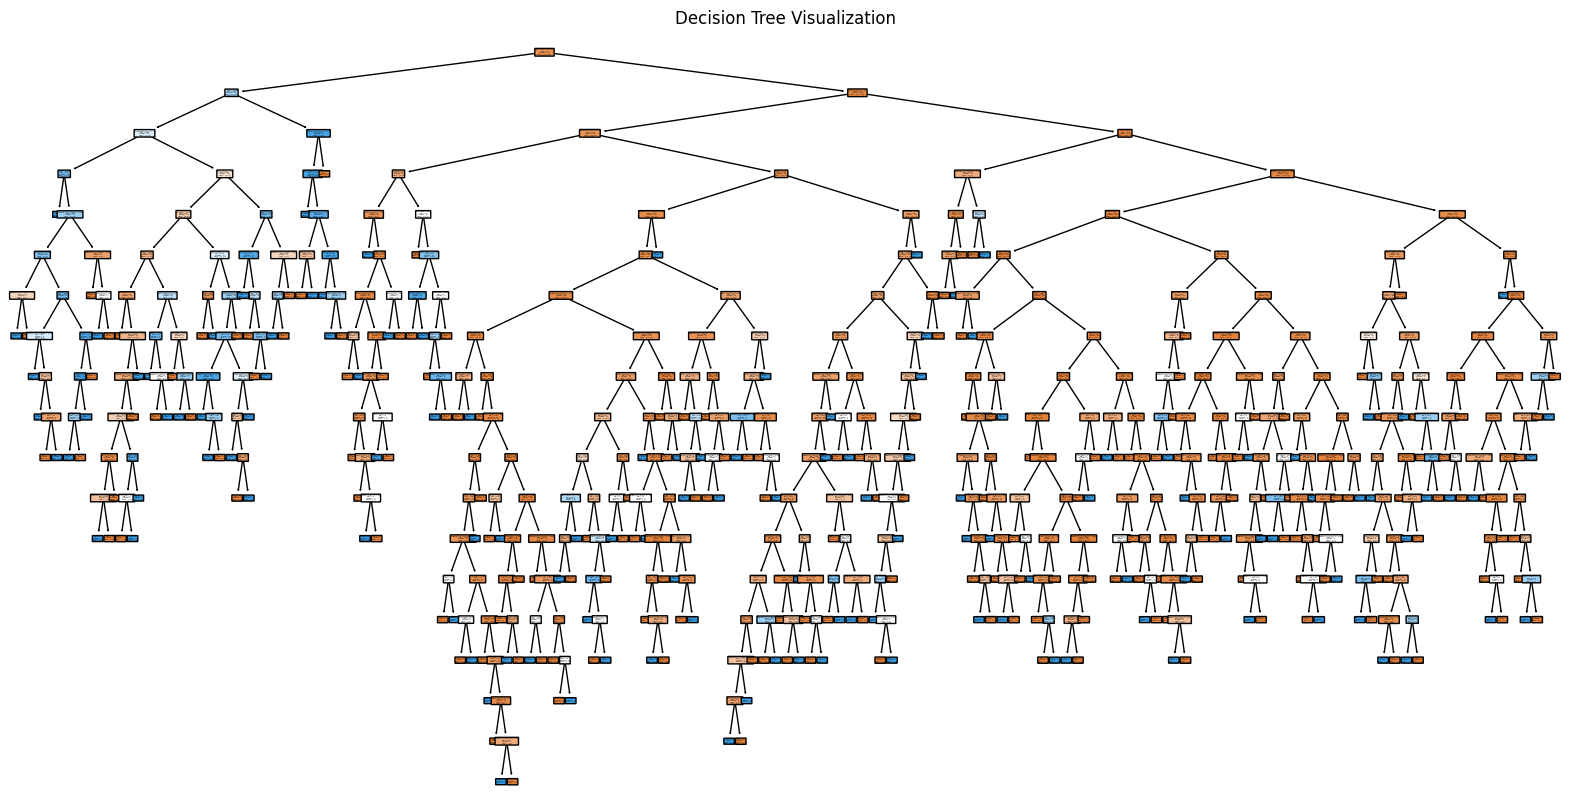

In [70]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model, 
    feature_names=list(X.columns),  # Convert feature names to a list
    class_names=['Alive', 'Dead'], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       583
           1       0.32      0.36      0.34        70

    accuracy                           0.85       653
   macro avg       0.62      0.63      0.63       653
weighted avg       0.86      0.85      0.85       653



In [72]:
# Train the decision tree with pruning
clf = DecisionTreeClassifier(ccp_alpha=0.01)  # Adjust ccp_alpha as needed
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

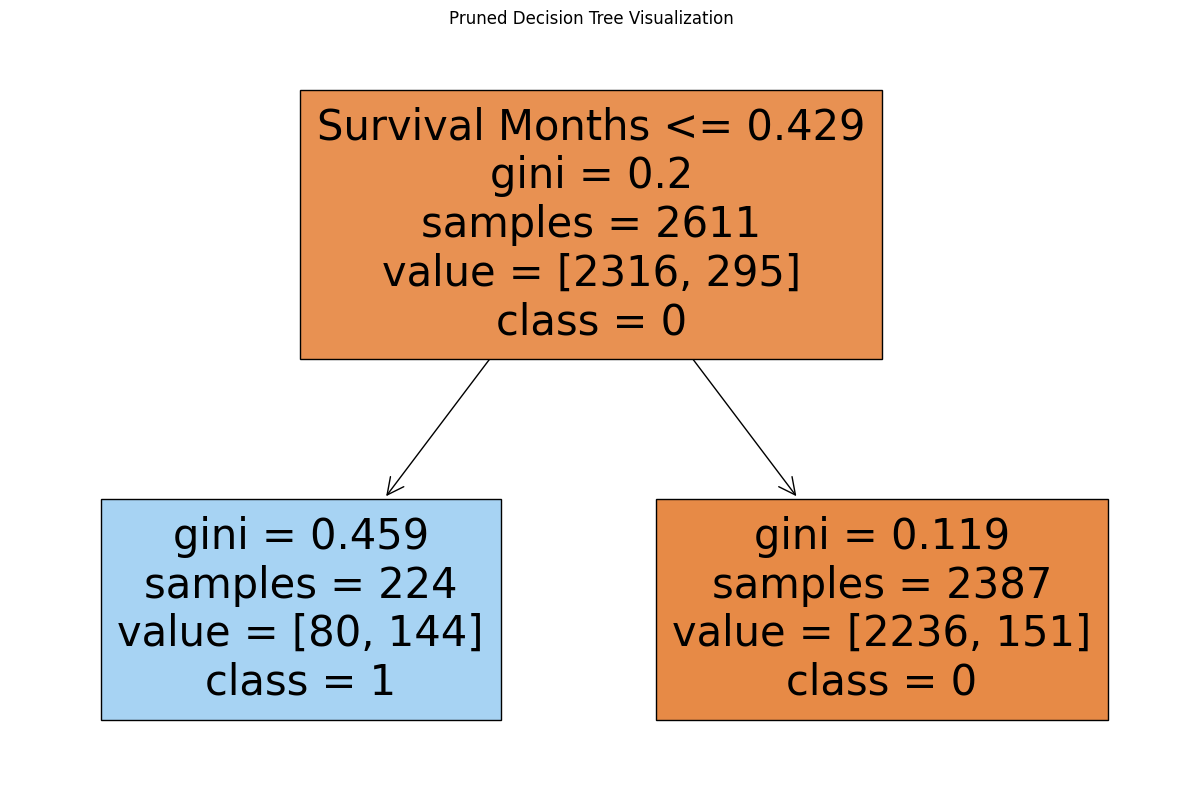

In [73]:
# Convert class names to string if they are not already
class_names = [str(cls) for cls in clf.classes_]

# Visualize the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=class_names)
plt.title("Pruned Decision Tree Visualization")
plt.show()

In [74]:
# Evaluate the model
print("Training accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))

Training accuracy: 0.9115281501340483
Test accuracy: 0.9111791730474732


# 2. Fit the data to your decision tree model and show the validation loss and accuracy  plot varying the epoch (iteration) value from 1 to 20.

In [75]:
# Lists to store results
epochs = np.arange(1, 21)
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

In [76]:
# Loop over different values of ccp_alpha
for epoch in epochs:
    ccp_alpha = epoch * 0.01  # Example: increase ccp_alpha with epochs
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    
    # Calculate training accuracy and loss
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    
    # For loss, we can calculate it as 1 - accuracy
    train_losses.append(1 - train_acc)
    test_losses.append(1 - test_acc)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

In [77]:
# Calculate training accuracy and loss
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

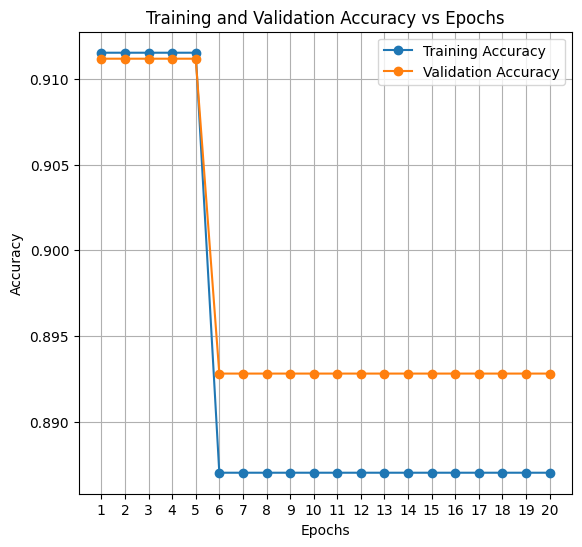

In [78]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid()

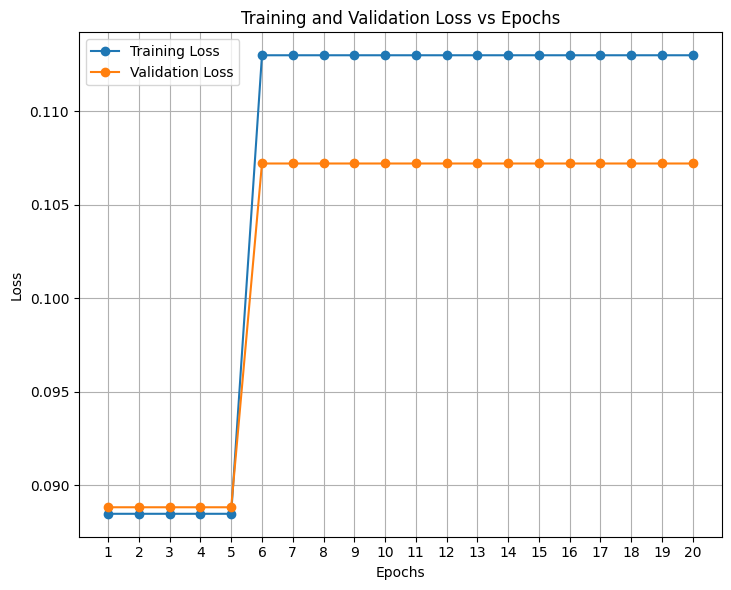

In [79]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, test_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()